# Example 3, no zero contour

If there is no contour the initial zero finding will fail to converge to a zero value.  After each Newton's step the code checks the value of the function to see if it is without the set tolerance of zero, if it is not it takes another step.  After a fixed number of steps (`5 * max_newton`) if one of the inputs does not terminate, the zero finding code will write all value to `NaN` for that particular input.

```{note}
This is done with a threshold cut on the path's value set to 20 times the tolerance, if the path eventually finds its way to a contour it will return non-NaN values.
```

If you would rather the code throw an error when any of the input points fail set the keyword `silent_fail=False`.  With this set the code will raise a `ValueError` value indicating it did not find a contour for at least one of the inputs and provide the index for those inputs.

```{note}
Just because one initial point fails to find a contour does not mean another point will also fail.  Newton's method will get stuck if its path travels through any point where the gradient is equal to zero (e.g. a maximum or minimum of the function).  Try to make sure your initial points are not near the any extremum of the function.
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from jax_zero_contour import ZeroSolver

Let's make a function that is always positive.

In [3]:
@jax.tree_util.Partial
def f(pos):
     # avoid r=0 so the grad is finite
    r = jnp.sqrt(jnp.sum(pos**2, axis=0)+ 1e-15)
    return jnp.sinc(r) + 0.5

In [4]:
n = 1024
x = jnp.linspace(-2, 2, n)
y = jnp.linspace(-2, 2, n)
X, Y = jnp.meshgrid(x, y)
z = f(jnp.stack([X, Y]))

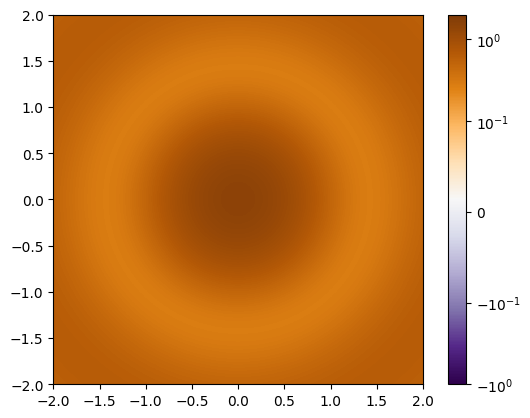

In [5]:
plt.imshow(
    z,
    extent=(x.min(), x.max(), y.min(), y.max()),
    norm=colors.SymLogNorm(linthresh=0.1, vmin=-1, vmax=2),
    cmap='PuOr_r',
    origin='lower',
    interpolation='nearest'
)
plt.colorbar();

In [6]:
zs = ZeroSolver()

In [7]:
init_guess_1 = jnp.array([[0.0, -0.6], [0.0, 1.0]])
output = zs.zero_contour_finder(
    f,
    init_guess_1
)
print(output[0]['value'])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


As expected, the zero finder code was unable to identify any zero values based on the initial point and all the output values are NaN.  If we wanted to let the code to return an error instead we can set the keyword `silent_fail=False`.

In [8]:
init_guess_1 = jnp.array([[0.0, -0.6], [0.0, 1.0]])
output = zs.zero_contour_finder(
    f,
    init_guess_1,
    silent_fail=False
)

ERROR:2025-06-23 16:34:08,159:jax._src.debugging:95: jax.debug.callback failed
Traceback (most recent call last):
  File "/Users/coleman/anaconda3/envs/lensing/lib/python3.10/site-packages/jax/_src/debugging.py", line 93, in debug_callback_impl
    callback(*args)
  File "/Users/coleman/anaconda3/envs/lensing/lib/python3.10/site-packages/jax/_src/debugging.py", line 278, in _flat_callback
    callback(*args, **kwargs)
  File "/Users/coleman/Desktop/UoP/lensing/Jax-Zero-Contour/jax_zero_contour/zero_contour_finder.py", line 247, in excepting_message
    raise ValueError(f'No zero contour found after 5 * max_newton ({5 * self.max_newton}) iterations')
ValueError: No zero contour found after 5 * max_newton (25) iterations


Index of failed input(s): [0 1]
